      trending_date  category_id   views  likes  dislikes  comment_count
0                14           22   62408    334       190             50
1                14           22  330043  43841      2244           2977
2                14           24  424596  49854       714           2944
3                14           22  112851   3566       122             80
4                14           24  243469  36216       631           1692
...             ...          ...     ...    ...       ...            ...
1595             21            2    5498    373        19             49
1596             21            2   40394   1339       179            201
1597             21           25    3516     65         7              4
1598             21           25   47507   4372       231           2380
1599             21           25    5079      0         0              0

[1600 rows x 6 columns]
Figure(640x480)
Figure(600x600)


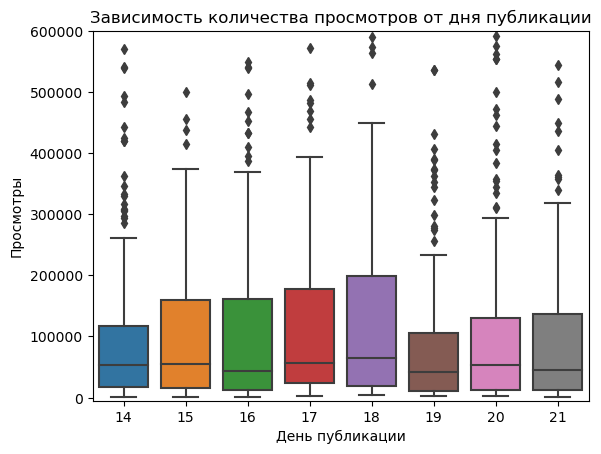

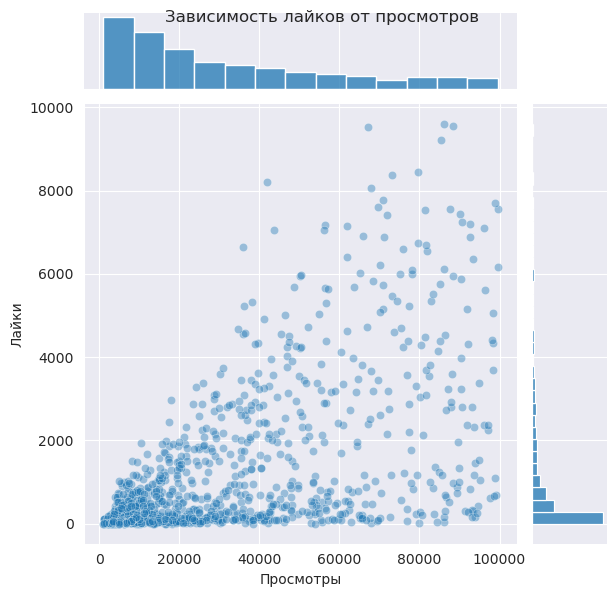

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
import typing as tp


class YouTube:
    # Загрузка датасета с данными о трендах на YouTube.
    def __init__(self, path_to_df: str = "RUvideos_short.csv"):
        self.df = pd.read_csv(path_to_df, delimiter=',')

    # Возвращаем считанную таблицу с колонкой trending_date типа datetime64
    def task1(self) -> pd.DataFrame:
        self.df['trending_date'] = pd.to_datetime(self.df['trending_date'], format="%y.%d.%m") # пример как было: 17.14.11 
        self.df["trending_date"] = self.df["trending_date"].astype("datetime64") # пример как стало: 2017-11-14 
        return self.df

    # В таблице много лишних данных. Оставьте следующие столбцы:
    # trending_date − дата в формате год-день-месяц;
    # Из даты остается только день. Для этого пройдемся циклом по всем датам и возьмем поле day у объекта даты. 
    # category_id − категория видео (названия приведены в файле RU_category_id.json, но в этой задаче они не пригодятся);
    # views − количество просмотров видео;
    # likes − количество лайков;
    # dislikes − количество дислайков;
    # comment_count − количество комментариев.
    def task2(self) -> pd.DataFrame:
        YouTube_data=self.task1()
        # Удаляем лишние колонки
        del YouTube_data['video_id']
        del YouTube_data['title']
        del YouTube_data['channel_title']
        del YouTube_data['publish_time']
        del YouTube_data['tags']
        del YouTube_data['thumbnail_link']
        del YouTube_data['comments_disabled']
        del YouTube_data['ratings_disabled']
        del YouTube_data['video_error_or_removed']
        del YouTube_data['description']
        # Оставляем от даты только день
        # Циклы почему-то запрещены, хотя их здесь советовали использовать
        self.df["trending_date"] = self.df["trending_date"].astype("datetime64").dt.strftime('%d')
        self.df["trending_date"] = self.df["trending_date"].astype("int")
        return YouTube_data

    # Строим ящики с усами на каждый день по количеству просмотров.
    def task3(self) -> Figure:
        plt.title("Зависимость количества просмотров от дня публикации")
        figure = sns.boxplot(x='trending_date', y='views', data=self.df)
        figure.set_xlabel("День публикации");
        figure.set_ylabel("Просмотры")
        return plt.gcf()

    # В task 3 получились страшные и почти нечитаемые графики, исправим это.
    def task4(self) -> Figure:
        plt.title("Зависимость количества просмотров от дня публикации")
        figure = sns.boxplot(x='trending_date', y='views', data=self.df)
        figure.set_xlabel("День публикации");
        figure.set_ylabel("Просмотры")
        plt.ylim((-5000, 600000))
        return plt.gcf()
    # Видим, что среднее количество просмотров у видео примерно равно 50000, особо не меняется в течение недели.
    # Достаточно много видео ежедневно набирали от 20000 до 150000 просмотров.
    # 18 числа несколько видео набрали очень много просмотров, поэтому среднее значение в этот день является самым большим.
    # 19 числа почти все видео не набрали более 400000 просмотров, кроме одного, собравшего около 9 млн. 
    # Cреднее значение просмотров в 19 день является самым маленьким из всех рассмотренных дней.
    # Если не учитывать видео, собравшие более 300000 просмотров,
    # то боксплоты по просмотрам для каждого из дней будут выглядеть почти одинаково.

    # Строим jointplot по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной.
    def task5(self) -> Figure:
        with sns.axes_style("darkgrid"):
            figure = sns.jointplot(x='views', y='likes', data=self.df, alpha=0.2)
            figure.fig.suptitle("Зависимость лайков от просмотров")
            figure.set_axis_labels('Просмотры', 'Лайки');
            return plt.gcf()
    
    # Исправляем неинформативность графика из task5
    def task6(self) -> Figure:
        with sns.axes_style("darkgrid"):
            final_data=self.df[self.df.likes <= 10000]
            final_data=final_data[final_data.views <= 100000]
            figure = sns.jointplot(x='views', y='likes', data=final_data, alpha=0.4)
            figure.fig.suptitle("Зависимость лайков от просмотров")
            figure.set_axis_labels('Просмотры', 'Лайки');
            # Убрали из графика некоторое количество точек, которые имеют более 100000 просмотров или более 10000 лайков.
            return plt.gcf()


new_youTube = YouTube()
#print(new_youTube.task1())
print(new_youTube.task2())
#print(new_youTube.task3())
print(new_youTube.task4())
#print(new_youTube.task5())
print(new_youTube.task6())